1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.


During matrix multiplication, each element of the new matrix c(i,j) is a dot product of the ith row of first matrix and jth column of the second matrix.

An (n,k) matrix multiplied by a (k,m) matrix gives a (n,m) matrix.

During the process, we end up having n*m dot products calculated.

In each dot product, there are k multiplications and k-1 additions that are taking place.

Therefore, there are a total of n*m*k multiplications and n*m*(k-1) additions.


2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?




In [ ]:
import time
import numpy as np

def multiplication(A, B):

    n = len(A)
    k = len(B)
    m = len(B[0])

    C = [[0] * m for _ in range(n)]

    for i in range(n):
        for j in range(m):
            C[i][j] = sum(A[i][l] * B[l][j] for l in range(k))

    return C

n = 100
k = 100
m = 100
A = np.random.rand(n, k).tolist()
B = np.random.rand(k, m).tolist()

start_time = time.time()
C_list = multiplication(A, B)
end_time = time.time()
print("multplication using list of lists", C_list)
print('')
print("Time taken using list of lists", end_time - start_time)

A = np.array(A)
B = np.array(B)

start_time = time.time()
C_np = np.dot(A, B)
end_time = time.time()
print("Multiplication using numpy", C_np)
print('')
print("Time taken using numpy", end_time - start_time)


multplication using list of lists [[24.18096420581226, 22.767553731934342, 24.297488805834362, 26.05085018298479, 23.347071490585236, 26.619000720524514, 24.658570470900315, 24.320994426222587, 24.4799764029292, 24.202754314894285, 21.84756075991643, 25.216464791305828, 25.09461902257499, 24.69018596630688, 24.416666343449084, 25.306378070293047, 23.134581369333105, 26.733775635056244, 25.138223338327265, 25.881132291139874, 24.9673061000546, 25.969624210992084, 24.969163718411835, 24.578489097489985, 26.159235328545982, 26.578019506284328, 22.1020545969797, 22.635363165987652, 23.589075008463414, 24.82154964577238, 21.07084077113169, 27.011293523655773, 25.61555205050509, 27.554892438917566, 23.64366539324781, 25.593087221000776, 24.645030658791217, 25.03461663251928, 23.82111985389641, 23.714284548415787, 26.465343281875235, 23.61701970304785, 22.714271072549664, 23.205207120801393, 24.592385320961746, 25.2567706101069, 24.110050253382585, 21.518976466337644, 23.56911742111013, 24.72

Numpy version is usually faster because it is a highly optimised library for matrix calculations written in C. It was built primarily to handle large matrices. It does so by using concepts like vectorisation, contiguous memory storage as well as homogeinity of the array (only one data type is allowed throughout the array).







3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

Using the above given code, we would technically be sorting the array and have an expected time complexity of $O(n*log(n))$. A better method would to use the quickselect algorithm which can do the same thing in $O(n)$ time complexity.

In [ ]:
import numpy as np
import random
import time

array = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

def median_sorting(arr):
    sorted_arr = sorted(arr)
    n = len(sorted_arr)
    if n % 2 == 1:
        return sorted_arr[n // 2]
    else:
        mid1, mid2 = sorted_arr[n // 2 - 1], sorted_arr[n // 2]
        return (mid1 + mid2) / 2

def median_quickselect(arr):
    def partition(left, right, pivot):
        pivotval = arr[pivot]
        arr[pivot], arr[right] = arr[right], arr[pivot]
        store = left
        for i in range(left, right):
            if arr[i] < pivotval:
                arr[store], arr[i] = arr[i], arr[store]
                store += 1
        arr[right], arr[store] = arr[store], arr[right]
        return store

    def quickselect(left, right, k):
        if left == right:
            return arr[left]
        pivot = random.randint(left, right)
        pivot = partition(left, right, pivot)
        if k == pivot:
            return arr[k]
        elif k < pivot:
            return quickselect(left, pivot - 1, k)
        else:
            return quickselect(pivot + 1, right, k)

    n = len(arr)
    if n % 2 == 1:
        return quickselect(0, n - 1, n // 2)
    else:
        mid1 = quickselect(0, n - 1, n // 2 - 1)
        mid2 = quickselect(0, n - 1, n // 2)
        return (mid1 + mid2) / 2

np.random.seed(0)
array_size = 100000
arr = np.random.randint(0, 100000, array_size)

start_time = time.time()
median_numpy = np.median(arr)
end_time = time.time()
print(f"NumPy median: {median_numpy}, {end_time - start_time:.6f} seconds")

start_time = time.time()
median_sort = median_sorting(arr.tolist())
end_time = time.time()
print(f"Naive method median: {median_sort}, {end_time - start_time:.6f} seconds")

start_time = time.time()
median_quickselect = median_quickselect(arr.tolist())
end_time = time.time()
print(f"QuickSelect median: {median_quickselect}, {end_time - start_time:.6f} seconds")


NumPy median: 50050.5, 0.001440 seconds
Naive method median: 50050.5, 0.031747 seconds
QuickSelect median: 50050.5, 0.113933 seconds


4. What is the gradient of the following function with respect to x and y?
$x^2*y + y^3*sinx$

The gradient of the given function is a vector of the derivative of the function with respect to x, derivative of the function with respect to y.

Therefore, the gradient is equal to:
$(2xy + (y^3)cos(x) , x^2 + (3y^2)sin(x))$

5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y


In [ ]:
import jax
import math
import jax.numpy as jnp
import numpy as np

def gradient(x,y):
  return [2 * x * y + (y**3) * math.cos(x) , x**2 + (3 * y**2) * math.sin(x)]

#Using JAX
def jaxgradient(x,y):
    return (x**2) * y + (y**3) * jnp.sin(x)
jaxgrad = jax.grad(jaxgradient,argnums=(0, 1))

x=np.random.rand(5)
y=np.random.rand(5)

for i in range(len(x)):
  grad = jaxgrad(x[i],y[i])
  print("Gradient Using Formula: ", gradient(x[i],y[i])[0], gradient(x[i],y[i])[1])
  print("Gradient Using JAX: ", grad[0], grad[1])

Gradient Using The Formula:  0.687941329829019 1.1170567541783418
Gradient Using JAX:  0.6879414 1.1170568
Gradient Using The Formula:  0.39016687716332965 0.20189426291349866
Gradient Using JAX:  0.3901669 0.20189428
Gradient Using The Formula:  1.0335455708403336 0.4938176409027074
Gradient Using JAX:  1.0335456 0.49381766
Gradient Using The Formula:  0.11147559619167148 0.47496363232782607
Gradient Using JAX:  0.111475594 0.47496364
Gradient Using The Formula:  0.6212104967170273 0.626090473698874
Gradient Using JAX:  0.62121046 0.6260904


6. Use sympy to confirm that you obtain the same gradient analytically.

In [ ]:
import sympy as sp

x,y=sp.symbols('x y')
function = (x**2)*y + (y**3)*sp.sin(x)

gradientx = sp.diff(function,x)
gradienty = sp.diff(function,y)
print((gradientx, gradienty))

(2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x))


7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

2022
Branch 1
Roll Number: 1, Name: N, Marks:
Maths: 100, English: 70 …
Branch 2
2023
Branch 1
Branch 2
2024
Branch 1
Branch 2
2025
Branch 1
Branch 2


In [ ]:
students_records = {
    2022: {
        'Branch 1': {
            1: {
                'Name': 'Rishabh',
                'Marks': {
                    'Maths': 95,
                    'English': 85,
                    'Science': 90
                }
            },
            2: {
                'Name': 'Jash',
                'Marks': {
                    'Maths': 88,
                    'English': 76,
                    'Science': 80
                }
            }
        },
        'Branch 2': {
            1: {
                'Name': 'Vidit',
                'Marks': {
                    'Maths': 78,
                    'English': 82,
                    'Science': 85
                }
            }
        }
    },
    2023: {
        'Branch 1': {
            1: {
                'Name': 'Rishabh',
                'Marks': {
                    'Maths': 92,
                    'English': 88,
                    'Science': 91
                }
            }
        },
        'Branch 2': {
            1: {
                'Name': 'Jash',
                'Marks': {
                    'Maths': 85,
                    'English': 89,
                    'Science': 87
                }
            }
        }
    },
    2024: {
        'Branch 1': {
            1: {
                'Name': 'Vidit',
                'Marks': {
                    'Maths': 90,
                    'English': 80,
                    'Science': 85
                }
            }
        },
        'Branch 2': {
            1: {
                'Name': 'Rishabh',
                'Marks': {
                    'Maths': 84,
                    'English': 78,
                    'Science': 82
                }
            }
        }
    },
    2025: {
        'Branch 1': {
            1: {
                'Name': 'Jash',
                'Marks': {
                    'Maths': 91,
                    'English': 87,
                    'Science': 89
                }
            }
        },
        'Branch 2': {
            1: {
                'Name': 'Vidit',
                'Marks': {
                    'Maths': 79,
                    'English': 80,
                    'Science': 75
                }
            }
        }
    }
}

# Example of accessing data
print(students_records[2022]['Branch 1'][1]['Name'])
print(students_records[2023]['Branch 2'][1]['Marks']['Maths'])


Rishabh
85


8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [ ]:
class Student:
    def __init__(self, name, roll_number, marks):
        self.name = name
        self.roll_number = roll_number
        self.marks = marks

class branch:
    def __init__(self, branchname, students):
        self.branchname = branchname
        self.students = students

class Year:
    def __init__(self, year, branches):
        self.year = year
        self.branches = branches

Rishabh = Student("Rishabh", 1, {'Maths':100, 'Physics':99})
Jash = Student("Jash", 2, {'Maths':96, 'Physics':92})
Vidit = Student("Vidit", 3, {'Maths':97, 'Physics':98})
Arnav = Student("Arnav", 4, {'Maths':98, 'Physics':97})
Del = Student("Del", 5, {'Maths':99, 'Physics':96})

Mech23 = branch("Mech", [Rishabh, Jash])
Mech24 = branch("Mech", [Vidit])
CS23 = branch("CS", [Del])
CS23 = branch("CS", [Arnav])

year2023 = Year(2023, [Mech23, CS23])
year2024 = Year(2024, [Mech24])

database = [year2023, year2024]

print(database[0].branches[0].branchname)
print(database[1].branches[0].students[0].marks['Maths'])

Mech
97


9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

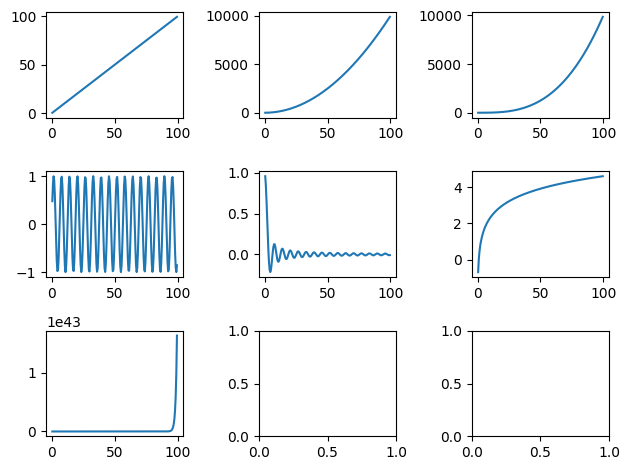

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.5, 100.0, 0.5)

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3)

ax1.plot(x, x)
ax2.plot(x, x**2)
ax3.plot(x, (x**3)/100)
ax4.plot(x, np.sin(x))
ax5.plot(x, np.sin(x)/x)
ax6.plot(x, np.log(x))
ax7.plot(x, np.exp(x))

plt.tight_layout()

plt.show()

10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.



In [ ]:
import numpy as np
import pandas as pd

matrix = np.random.uniform(1, 2, size=(20, 5))
print(matrix, end='\n\n')
df = pd.DataFrame(matrix, columns=['a', 'b', 'c', 'd', 'e'])
print(df, '\n\n')
print('Column with highest std dev is : ', df.std().idxmax(), end = '\n\n')
print('Row with lowest mean is : ', df.mean(axis=1).idxmin())

[[1.77690863 1.33931179 1.79484568 1.10725768 1.39864083]
 [1.77370979 1.38753901 1.27749545 1.97343095 1.13837641]
 [1.19280541 1.09260666 1.61920579 1.96482307 1.21671075]
 [1.73059341 1.85974037 1.55760663 1.13387514 1.79903229]
 [1.50380145 1.29242204 1.6437206  1.14714748 1.78114057]
 [1.44809084 1.91292582 1.40644984 1.11941231 1.03164537]
 [1.24970379 1.03221224 1.78918846 1.28230335 1.31610957]
 [1.35931643 1.81117547 1.08476071 1.35591289 1.20279736]
 [1.54636034 1.46425418 1.82519649 1.8731337  1.16920547]
 [1.37426496 1.61836298 1.68861551 1.29638877 1.11279967]
 [1.21224839 1.02952215 1.84576339 1.35741429 1.80139392]
 [1.002048   1.42961416 1.30862792 1.91014158 1.85694634]
 [1.56310774 1.0410771  1.40996442 1.23282889 1.72943118]
 [1.0721738  1.35693638 1.98588751 1.16038159 1.27193828]
 [1.11522145 1.0472102  1.02956895 1.1703912  1.02353281]
 [1.76307053 1.54489461 1.70618106 1.82233273 1.08637375]
 [1.15542023 1.90198358 1.62946733 1.54105627 1.79794956]
 [1.24231961 1

11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.


In [ ]:
df['f'] = df['a'] + df['b'] + df['c'] + df['d'] + df['e']
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')
print('The new data frame is : ')
print(df, end = '\n\n')

rowslessthan = (df['g'] == 'LT8').sum()
std_lessthan = df[df['g'] == 'LT8']['f'].std()
std_greaterthan = df[df['g'] == 'GT8']['f'].std()

print(f'Number of rows less than 8 are {rowslessthan}\n')
print(f'Standard deviation of rows less than 8 is {std_lessthan}\n')
print(f'Standard deviation of rows greater than 8 is {std_greaterthan}')


The new data frame is : 
           a         b         c         d         e         f    g
0   1.776909  1.339312  1.794846  1.107258  1.398641  7.416965  LT8
1   1.773710  1.387539  1.277495  1.973431  1.138376  7.550552  LT8
2   1.192805  1.092607  1.619206  1.964823  1.216711  7.086152  LT8
3   1.730593  1.859740  1.557607  1.133875  1.799032  8.080848  GT8
4   1.503801  1.292422  1.643721  1.147147  1.781141  7.368232  LT8
5   1.448091  1.912926  1.406450  1.119412  1.031645  6.918524  LT8
6   1.249704  1.032212  1.789188  1.282303  1.316110  6.669517  LT8
7   1.359316  1.811175  1.084761  1.355913  1.202797  6.813963  LT8
8   1.546360  1.464254  1.825196  1.873134  1.169205  7.878150  LT8
9   1.374265  1.618363  1.688616  1.296389  1.112800  7.090432  LT8
10  1.212248  1.029522  1.845763  1.357414  1.801394  7.246342  LT8
11  1.002048  1.429614  1.308628  1.910142  1.856946  7.507378  LT8
12  1.563108  1.041077  1.409964  1.232829  1.729431  6.976409  LT8
13  1.072174  1.356936 

12. Write a small piece of code explaining braodcasting in numpy

Broadcasting in numpy is a feature which enables numpy to do certain algebraic operations between numpy arrays of different sizes. Essentially, broadcasting assigns extra dimensions to the numpy array vector of smaller size so as to make its size compatible with the other vectors with which the algebraic operation is supposed to be performed.

In [ ]:
arr = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
scalar = 2
print(arr, end= '\n\n')
result = arr + scalar
print(result)

[[1 2 3]
 [4 5 6]
 [7 8 9]]

[[ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


As we can see, the scalar could be added to the matrix even though its dimension is not the same as the dimension of the matrix. This is because numpy automatically broadcasts the scalar to become a matrix of 3*3 dimension and then adds it to the result.


13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [ ]:
import numpy as np

def argmin(arr):
    min_index = 0
    min_value = arr[0]
    for i in range(1, len(arr)):
        if arr[i] < min_value:
            min_value = arr[i]
            min_index = i
    return min_index

arr = np.array([5, 2, 8, 1, 9])
print(argmin(arr))

3
